In [1]:
from sklearn.model_selection import train_test_split

# Validacion cruzada
from sklearn.model_selection import cross_val_score

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Arbol de decisión (Clasificacion)
from sklearn.tree import DecisionTreeClassifier

# Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
df = pd.read_csv("titanic_dataset.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Primero vamos a eliminar las columnas que no nos aportan datos de valor para nuestro modelo de predicción
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.shape

(891, 8)

In [5]:
# Comprobamos si hay valores nulos
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
# En la columna "Age" tenemos un total de 177 valores nulos. Procedemos a eliminarlos.
# Hacemos lo mismo con los valores nulos de la columna "Embarked"
df.dropna(inplace=True)

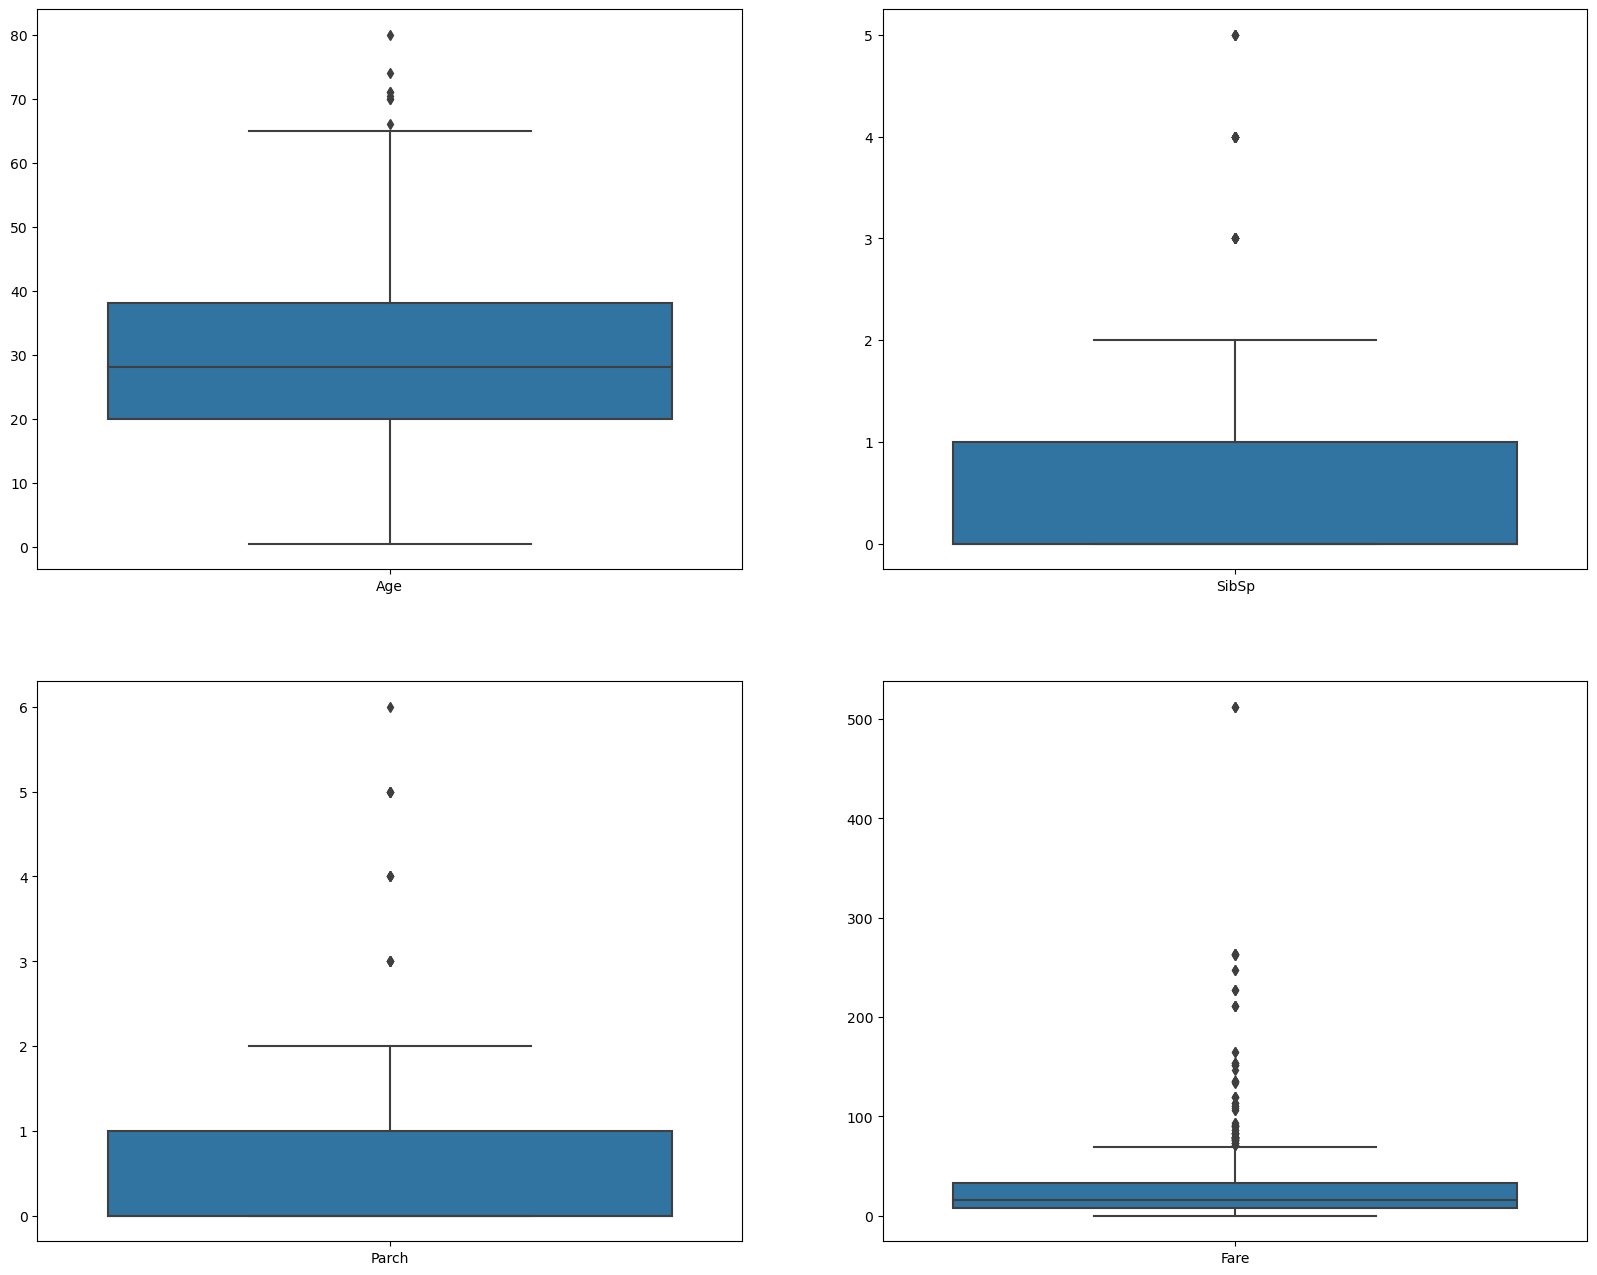

In [7]:
# Comprobamos si hay valores atípicos
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.boxplot(df[["Age"]])

plt.subplot(2,2,2)
sns.boxplot(df[["SibSp"]])

plt.subplot(2,2,3)
sns.boxplot(df[["Parch"]])

plt.subplot(2,2,4)
sns.boxplot(df[["Fare"]])

plt.show()

In [8]:
# Eliminamos los valores atípicos
df.drop(df[df["SibSp"] > 2].index.tolist(), axis=0, inplace=True)
df.drop(df[df["Parch"] > 2].index.tolist(), axis=0, inplace=True)
df.drop(df[df["Fare"] >= 200].index.tolist(), axis=0, inplace=True)

In [9]:
df.shape

(648, 8)

## Preprocesamiento de datos

#### Variable Dummy

La función dummy es una codificación One Hot Enconding, se encarga de codificar las variables categóricas. Separa por columnas los valores de una columna, indicando con 1 si cumple y con un 0 si no.

In [10]:
# Sex
sex_dum = pd.get_dummies(df["Sex"], prefix="Sex")
df.drop("Sex", axis=1, inplace=True)
df = df.join(sex_dum)

# Embarked
embarked_dum = pd.get_dummies(df["Embarked"], prefix="Embarked")
df.drop("Embarked", axis=1, inplace=True)
df = df.join(embarked_dum)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
# Eliminamos la columna 'Sex_male' por que con la columna 'Sex_female' podemos concluir que si el valor es igual a 1 es mujer,
# y si el valor es igual a 0 es varon.
df.drop("Sex_male", axis=1, inplace=True)

### Seleccion de datos

In [12]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [13]:
# Standard Scaler (ajustamos todos los valores en un rango de entre -1 y 1)
sc = StandardScaler()
x = sc.fit_transform(x)

### LDA

El LDA se encarga de separar lo máximo posible los grupos entre sí que afecta a cada clase.

In [18]:
lda = LDA()
x = lda.fit_transform(x, y)

lda.explained_variance_ratio_

array([1.])

### Creacion del modelo de prediccion (Arbol de decisión por clasificación)

In [19]:
# Validación cruzada
clf = DecisionTreeClassifier(max_depth=1)

scores = cross_val_score(clf, x, y, cv=10)
avg_score = np.mean(scores)

print(scores)
print(avg_score)

[0.81538462 0.72307692 0.78461538 0.87692308 0.8        0.83076923
 0.81538462 0.76923077 0.859375   0.8125    ]
0.8087259615384615


In [16]:
# Division de datos
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

x_plot = x_train.copy()

In [17]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [18]:
y_pred = clf.predict(x_val)

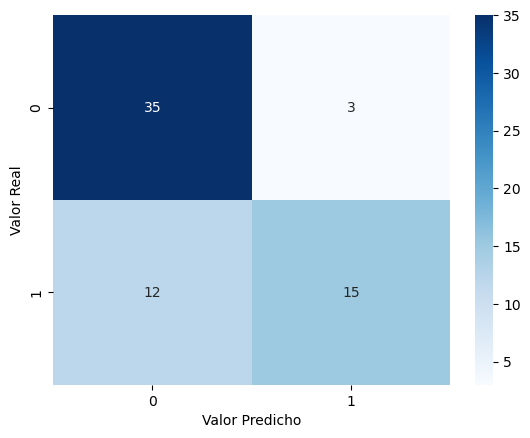

In [19]:
c_matrix = confusion_matrix(y_val, y_pred)

fg = sns.heatmap(c_matrix, cmap="Blues", annot=True)
fg.set_xlabel("Valor Predicho")
fg.set_ylabel("Valor Real")
plt.show()

In [20]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        38
           1       0.83      0.56      0.67        27

    accuracy                           0.77        65
   macro avg       0.79      0.74      0.75        65
weighted avg       0.78      0.77      0.76        65



Como podemos observar arriba, nuestro modelo ha tenido un total de 15 errores de predicción utilizando el conjunto de validación y una precisión total del 77%.

In [21]:
y_pred = clf.predict(x_test)

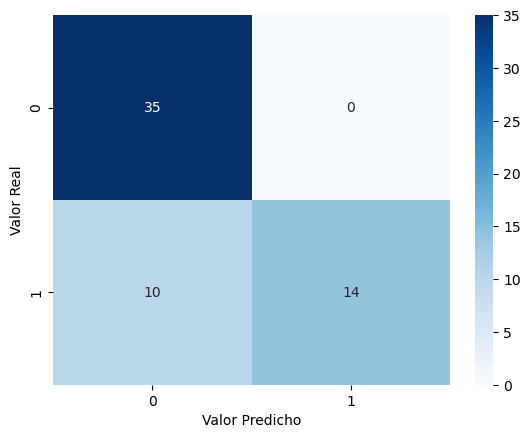

In [22]:
c_matrix = confusion_matrix(y_test, y_pred)

fg = sns.heatmap(c_matrix, cmap="Blues", annot=True)
fg.set_xlabel("Valor Predicho")
fg.set_ylabel("Valor Real")
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        35
           1       1.00      0.58      0.74        24

    accuracy                           0.83        59
   macro avg       0.89      0.79      0.81        59
weighted avg       0.87      0.83      0.82        59



Con en conjunto de testeo hemos conseguido reducir los errores de nuestro modelo y la precisión total ha aumentado hasta un 83%. Donde más se equivoca nuestro modelo es a la hora de predecir las personas que no sobreviven, cuando en realidad si que lo han hecho, es decir, es un falso negativo. Podemos observar que nuestro modelo es capaz de predecir con un 100% de aciertos las personas que si sobreviven pero baja hasta un 78% de acierto cuando tiene que predecir quien no sobrevive,
teniendo admás un 58% de recall de las personas que no sobreviven, es decir son falsos negativos, personas que el modelo indica que no sobreviven pero que en realidad si lo hacen.

Al aplicar la validación cruzada con una divisón de los datos en 10 partes, podemos observar que nuestro modelo tiene en promedio una precisión de un 81.4%, teniendo máximos de 87% y un mínimo del 75% de precisión utilizando el modelo de arbol de decisiones.

In [24]:
# Quiero ver la precisión de nuestro modelo utilizando el modelo KNN.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

scores1 = cross_val_score(knn, x, y, cv=10)
avg_score1 = np.mean(scores1)

print(scores1)
print(avg_score1)

[0.75384615 0.72307692 0.8        0.84615385 0.8        0.83076923
 0.8        0.78461538 0.8125     0.78125   ]
0.7932211538461539


Como podemos observar el modelo KNN tiene un precisión levemente menor que el modelo de arboles de decisión, exactamente un 2% inferior.